## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Roy Dadon 5714
# student 2: Sahar Aviad 5843
# student 3: Gil Yona 8017
# student 4: David Saadia 3401
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
# Embarked - Location entry to ship - we can assume theres no order
# Pclass - First class/ business class etc.
# SibSp - Number of siblings / partners
# Parch - Number of parents or kids
# Fare - Ticket cost

In [3]:
#IMPORTS
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import StratifiedKFold as cross_val
from sklearn.feature_selection import SelectKBest as select_k_best, VarianceThreshold, r_regression as pearson
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading dataset
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
label = "Survived"

In [5]:
titanic_train.shape

(712, 8)

In [6]:
titanic_test.shape

(179, 8)

In [7]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [8]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [9]:
print(titanic_train.describe())

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

## EDA: Detecting duplications, empty fields etc.
using duplicated, info

In [10]:
print("The amount of duplicates in the train set before cleaning:", titanic_train.duplicated().sum())
print("The amount of duplicates in the test set before cleaning:", titanic_test.duplicated().sum())

The amount of duplicates in the train set before cleaning: 80
The amount of duplicates in the test set before cleaning: 12


There are 80 duplicates in the train dataset, and 12 in the test set, therefore we remove them.

In [11]:
titanic_train.drop_duplicates(inplace = True)
print("The amount of duplicates in the train set after cleaning:",titanic_train.duplicated().sum())
titanic_test.drop_duplicates(inplace = True)
print("The amount of duplicates in the test set after cleaning:", titanic_test.duplicated().sum())

The amount of duplicates in the train set after cleaning: 0
The amount of duplicates in the test set after cleaning: 0


## Empty fields

Train:

In [12]:
print(titanic_train.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


Test:

In [13]:
print(titanic_test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


There are no empty fields in the datasets.

## Correlations and Visualisation
Checking all correlations with the target label "Survived". We will visualize the top 2 most correlated features 

In [14]:
X = titanic_train.copy().drop(labels = label, axis = 1)
y = titanic_train.copy()[label]

correlation = X.corrwith(y, axis = 0)
correlation = correlation.sort_values(ascending = False, key = lambda x: np.abs(x)).head(2)

correlation_pd = pd.DataFrame(correlation).T
correlation_pd.index = [label]
correlation_pd

,Sex,Pclass
Survived,-0.514598,-0.323125


The features "Sex" and "Pclass" are the top 2 most correlated features with "Survived", therefore visualizing them will help us get info

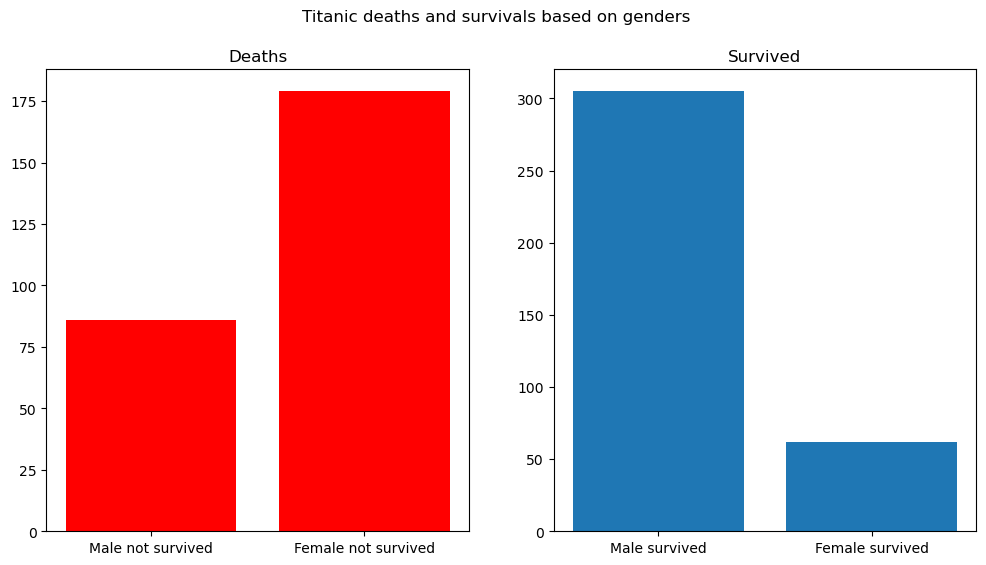

In [15]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
df_count = pd.DataFrame(titanic_train.value_counts(subset = ["Sex", label]))
count_list = list(df_count["count"])
count_list[0] , count_list[2] = count_list[2] , count_list[0]
x_labels = ["Male not survived", "Female not survived", "Male survived", "Female survived"]
ax[0].bar(x_labels[:2], count_list[:2], color = "red")
ax[0].set_title('Deaths')
ax[1].bar(x_labels[2:], count_list[2:])
fig.suptitle('Titanic deaths and survivals based on genders')
ax[1].set_title('Survived')
plt.show()

We will also show a kernal density plot

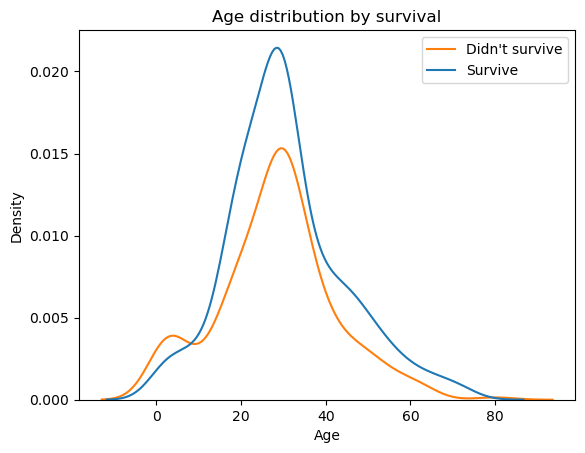

In [30]:
# correlation = X.corrwith(y, axis = 0)
# correlation = pd.DataFrame(correlation.sort_values(ascending = False, key = lambda x: np.abs(x))).T
# correlation.index = [label]
# correlation
# titanic_train
#ct = pd.crosstab(titanic_train[label], titanic_train["Age"])
df2 = titanic_train[[label, "Age"]]

k = sns.kdeplot(data = df2, x = "Age", hue = "Survived", common_norm = True)
k.legend(labels = ["Didn't survive", "Survive"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age distribution by survival")
plt.show()


We will show a heatmap of the correlation of each class.

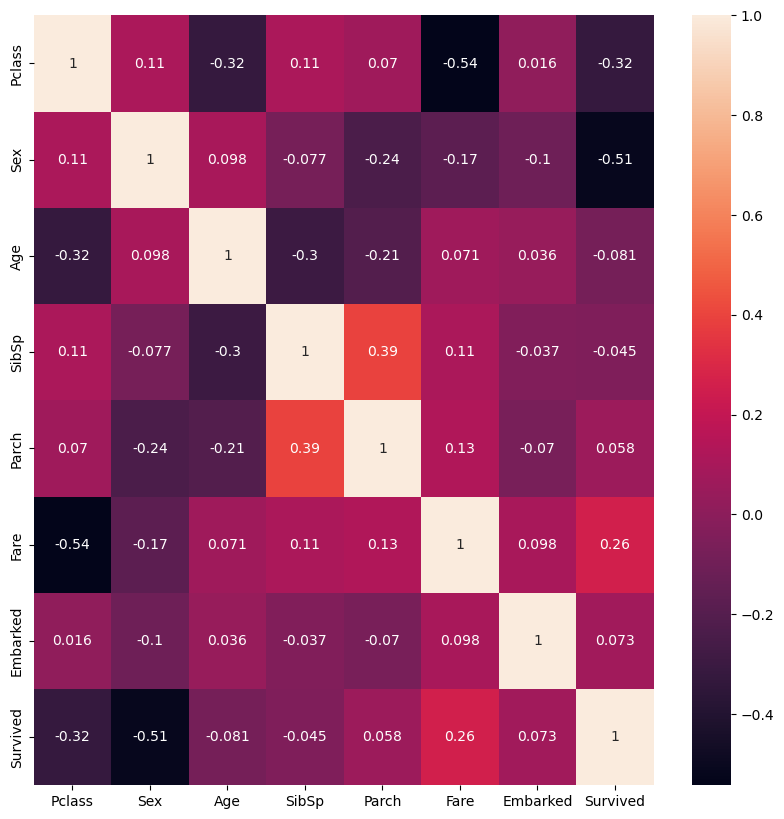

In [56]:
plt.figure(figsize = (10,10))
sns.heatmap(titanic_train.corr(), annot = True)
plt.show()

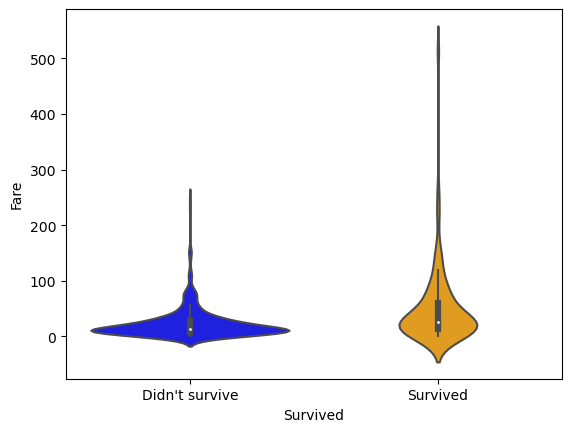

In [55]:
Violin= sns.violinplot(x="Survived", y="Fare", data=titanic_train, palette = ["blue", "orange"] )
xlabels = ["Didn't survive", "Survived"]
Violin.set(xticklabels=xlabels)
plt.show()

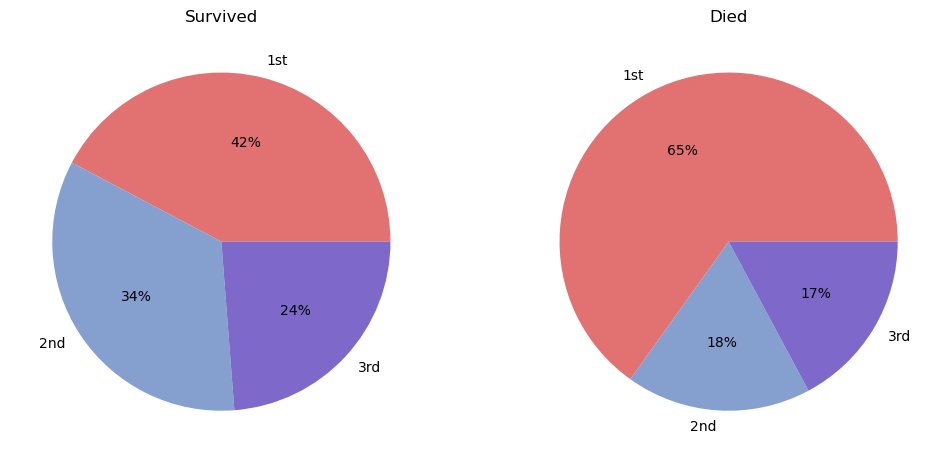

In [84]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
pallete_color= ["#e27171", "#859fcf", "#7e69cb"]	
surved = titanic_train[titanic_train[label] == 1]
notSurved = titanic_train[titanic_train[label] == 0]
ax[0].pie(surved["Pclass"].value_counts(), labels = ["1st", "2nd", "3rd"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[1].pie(notSurved["Pclass"].value_counts(), labels = ["1st", "2nd", "3rd"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[0].set_title("Survived")
ax[1].set_title("Died")
plt.show()

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## Part 4 - Apply on test and show model performance estimation